### Variables correlations

In [49]:
#Libraries we will be using

import pandas as pd
import numpy as np
import plotly
import plotly.plotly as py
from scipy import stats
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

#Credentials for plotly
plotly.tools.set_credentials_file(username='', api_key='')
plotly.tools.set_config_file(world_readable=True,
                             sharing='public')

#Setting for pandas to show all columns
pd.set_option('display.max_columns', None)

In [7]:
#import and read the train data

train = pd.read_csv('train_enriched.csv')

train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 93 columns):
Id                                       1460 non-null int64
MSSubClass                               1460 non-null int64
MSZoning                                 1460 non-null object
LotFrontage                              1201 non-null float64
LotArea                                  1460 non-null int64
Street                                   1460 non-null object
Alley                                    91 non-null object
LotShape                                 1460 non-null object
LandContour                              1460 non-null object
Utilities                                1460 non-null object
LotConfig                                1460 non-null object
LandSlope                                1460 non-null object
Neighborhood                             1460 non-null object
Condition1                               1460 non-null object
Condition2                   

Correlation between Sale Price and all variables

In [74]:
#we use the corr function for only the numneric features

train_numeric = train._get_numeric_data() #keep only numeric features
corr_matrix = train_numeric.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)



SalePrice                                1.000000
OverallQual                              0.790982
GrLivArea                                0.708624
GarageCars                               0.640409
GarageArea                               0.623431
TotalBsmtSF                              0.613581
1stFlrSF                                 0.605852
FullBath                                 0.560664
TotRmsAbvGrd                             0.533723
YearBuilt                                0.522897
YearRemodAdd                             0.507101
GarageYrBlt                              0.486362
MasVnrArea                               0.477493
Fireplaces                               0.466929
Median Household Income                  0.420421
Average Household Income                 0.419396
BsmtFinSF1                               0.386420
LotFrontage                              0.351799
Per Capita Income                        0.346627
WoodDeckSF                               0.324413


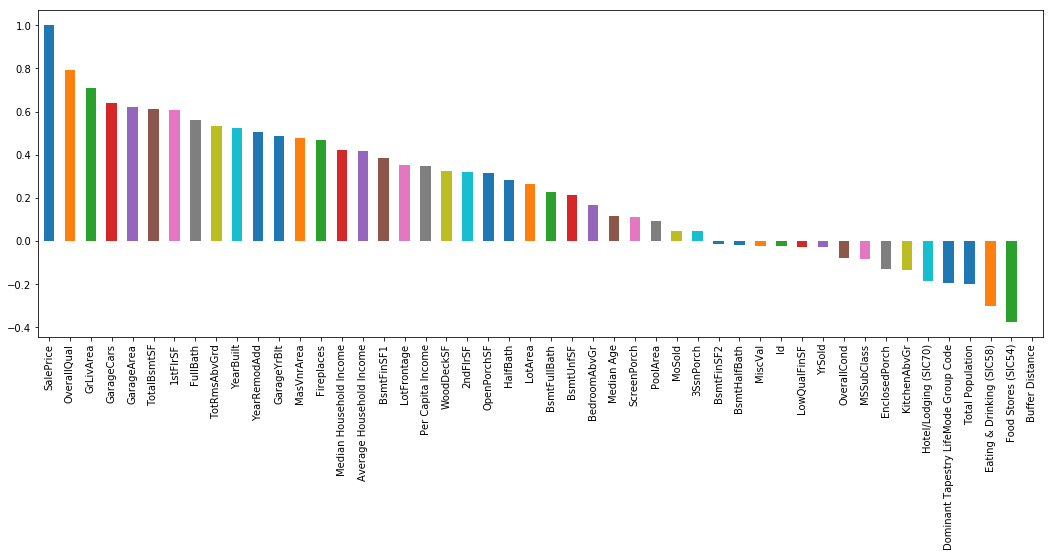

In [76]:
plt.figure(figsize=(18,6))
corr_matrix['SalePrice'].sort_values(ascending=False).plot.bar()

**Variables that Initially I considered important**

In [ ]:
Neighborhood
BldgType
OverallQual
OverallCond
YearBuilt
YearRemodAdd
TotalBsmtSF
HeatingQC
CentralAir
GrLivArea
Bedroom
GarageCars
GarageArea
PoolArea
PoolQC
YrSold
SaleCondition


### PCA to reduce the number of variables to choose

**PCA Preprocessing**

- Only numeric data
- NaNs not accepted

**PCA Steps**
- Standardize the data.
- Use the standardized data to create a covariance matrix.
- Use the resulting matrix to calculate eigenvectors (principal components) and their corresponding eigenvalues.
- Sort the components in decending order by its eigenvalue.
- Choose n components which explain the most variance within the data (larger eigenvalue means the feature explains more variance).
- Create a new matrix using the n components.

In [61]:
#We keep only  numeric values

train_numeric = train._get_numeric_data() #keep only numeric features

#train_numeric.info()

print(train_numeric.shape)

#We also need to take care of the NAs in order to be able to run the PCA algorithm

train_numeric = train_numeric.dropna()

print(train_numeric.shape)

#Drop in datasets is quite big! so we will need to deal with the NAs


(1460, 48)
(1121, 48)


In [72]:
#Standardize the data.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_numeric)

# Apply transform to both the training set and the test set.
train_PCA = scaler.transform(train_numeric)

30
30
[0.2182498  0.09669401 0.06629432 0.05523677 0.04626051 0.0354434
 0.03262229 0.02682357 0.02596319 0.02435296 0.02382426 0.02337178
 0.02277219 0.02207311 0.02022994 0.01985442 0.0193473  0.01798738
 0.01725302 0.01686854 0.01641368 0.01575423 0.01391523 0.01367897
 0.01267558 0.01140242 0.00999901 0.00964804 0.00835905 0.00803499]
[21.82497994 31.49438133 38.12381362 43.64749107 48.27354249 51.81788247
 55.08011118 57.76246794 60.35878705 62.7940835  65.17650983 67.51368821
 69.79090752 71.99821812 74.02121165 76.00665327 77.94138294 79.74012136
 81.46542303 83.15227715 84.79364473 86.36906777 87.76059065 89.12848777
 90.39604575 91.53628753 92.53618899 93.50099269 94.33689817 95.14039695]


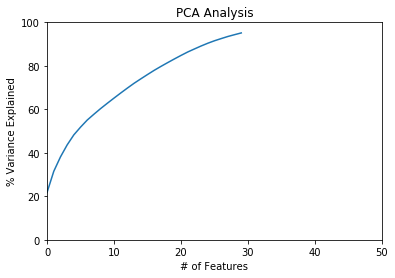

In [77]:
from  sklearn.decomposition import PCA

#Calculate the PCA so the selected variables explain at least 90% of the variance of our model 0.90
pca = PCA(0.95)

#Fit PCA on training set.
pca.fit(train_PCA)

#
print(pca.n_components_)
print(pca.n_components_)


#Apply the mapping (transform) to both the training set and the test set.
train_PCA = pca.transform(train_PCA)

#which is the variance ratio of each component?
print(pca.explained_variance_ratio_)

#and the total cumulutative
cumsum = np.cumsum(pca.explained_variance_ratio_*100)
print(cumsum) # we see reaches 90%

#which variables were actually selected?


#lets see this graphically
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.xlim(0,50)
plt.ylim(0,100)
plt.style.context('seaborn-whitegrid')
plt.plot(cumsum)